<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/unsupervised/04_anomaly_detection/04_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### prophet
Strona biblioteki: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)  

Dokumentacja/User Guide: [https://facebook.github.io/prophet/docs/quick_start.html](https://facebook.github.io/prophet/docs/quick_start.html)

Biblioteka do pracy z szeregami czasowymi od Facebook'a

Aby zainstalować bibliotekę prophet, użyj polecenia poniżej:
```
!pip install fbprophet
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade fbprophet
```
Kurs stworzony w oparciu o wersję `0.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [1]:
import fbprophet
import pandas as pd
import plotly.express as px

fbprophet.__version__

'0.5'

In [2]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', parse_dates=['timestamp'])
df.head()

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
timestamp    14398 non-null datetime64[ns]
count        14398 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


In [4]:
df.describe()

,count
count,14398.000000
mean,112.546917
std,26.512252
min,21.351000
25%,94.909075
50%,107.435000
75%,125.051250
max,250.000000


In [5]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection', width=800)

In [6]:
px.scatter(df, x='timestamp', y='count', opacity=0.3, title='Anomaly Detection', width=800)

In [7]:
data = df.copy()
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


Danymi wejściowymi do klasy Prophet jest zawsze obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn: 
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


In [8]:
from fbprophet import Prophet

model = Prophet(daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [9]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-25 14:01:00,137.758331,87.534149,192.775243,137.758331,137.758331,0.0,0.0,0.0,0.0,0.0,0.0,137.758331
1,2018-09-25 14:02:00,137.664419,86.745247,193.208376,137.664419,137.664419,0.0,0.0,0.0,0.0,0.0,0.0,137.664419
2,2018-09-25 14:03:00,137.570506,85.364512,194.122677,137.570506,137.570506,0.0,0.0,0.0,0.0,0.0,0.0,137.570506
3,2018-09-25 14:04:00,137.476593,84.397230,188.563884,137.476593,137.476593,0.0,0.0,0.0,0.0,0.0,0.0,137.476593
4,2018-09-25 14:05:00,137.382681,85.620721,194.608563,137.382681,137.382681,0.0,0.0,0.0,0.0,0.0,0.0,137.382681


In [10]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,137.758331,137.758331,87.534149,192.775243
1,2018-09-25 14:02:00,137.664419,137.664419,86.745247,193.208376
2,2018-09-25 14:03:00,137.570506,137.570506,85.364512,194.122677
3,2018-09-25 14:04:00,137.476593,137.476593,84.397230,188.563884
4,2018-09-25 14:05:00,137.382681,137.382681,85.620721,194.608563


In [11]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,137.758331,87.534149,192.775243,137.758331,137.758331,0.0,0.0,0.0,0.0,0.0,0.0,137.758331,182.478,1
1,2018-09-25 14:02:00,137.664419,86.745247,193.208376,137.664419,137.664419,0.0,0.0,0.0,0.0,0.0,0.0,137.664419,176.231,1
2,2018-09-25 14:03:00,137.570506,85.364512,194.122677,137.570506,137.570506,0.0,0.0,0.0,0.0,0.0,0.0,137.570506,183.917,1
3,2018-09-25 14:04:00,137.476593,84.397230,188.563884,137.476593,137.476593,0.0,0.0,0.0,0.0,0.0,0.0,137.476593,177.798,1
4,2018-09-25 14:05:00,137.382681,85.620721,194.608563,137.382681,137.382681,0.0,0.0,0.0,0.0,0.0,0.0,137.382681,165.469,1


[Plotly color scales](https://plot.ly/python/builtin-colorscales/)

In [12]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series', template='plotly_dark', width=900, height=500)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
timestamp    14398 non-null datetime64[ns]
count        14398 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


In [14]:
df_sep = df[df['timestamp'].dt.month == 9]
df_sep.columns = ['ds', 'y']
df_sep.head()

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [0]:
model = Prophet(daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(df_sep)
forecast = model.predict(df_sep)

In [16]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,162.551460,162.551460,116.712769,213.565130
1,2018-09-25 14:02:00,162.287604,162.287604,111.950837,208.850329
2,2018-09-25 14:03:00,162.023747,162.023747,117.068531,210.279341
3,2018-09-25 14:04:00,161.759891,161.759891,115.190107,205.366524
4,2018-09-25 14:05:00,161.496034,161.496034,111.383129,208.699257


In [17]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,162.551460,116.712769,213.565130,162.551460,162.551460,0.0,0.0,0.0,0.0,0.0,0.0,162.551460,182.478,1
1,2018-09-25 14:02:00,162.287604,111.950837,208.850329,162.287604,162.287604,0.0,0.0,0.0,0.0,0.0,0.0,162.287604,176.231,1
2,2018-09-25 14:03:00,162.023747,117.068531,210.279341,162.023747,162.023747,0.0,0.0,0.0,0.0,0.0,0.0,162.023747,183.917,1
3,2018-09-25 14:04:00,161.759891,115.190107,205.366524,161.759891,161.759891,0.0,0.0,0.0,0.0,0.0,0.0,161.759891,177.798,1
4,2018-09-25 14:05:00,161.496034,111.383129,208.699257,161.496034,161.496034,0.0,0.0,0.0,0.0,0.0,0.0,161.496034,165.469,1


In [18]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=900, height=500)

Wiki data

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
data = df.copy()
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [20]:
data.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [0]:
model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

In [32]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2007-12-10,1.349221,8.802711,7.596445,10.024092
1,2007-12-11,1.349148,8.554691,7.242990,9.757758
2,2007-12-12,1.349076,8.354953,7.148379,9.427898
3,2007-12-13,1.349003,8.332300,7.118757,9.566941
4,2007-12-14,1.348931,8.320971,7.119740,9.600822


In [33]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,real,anomaly
0,2007-12-10,1.349221,7.596445,10.024092,1.349221,1.349221,4.917132,4.917132,4.917132,5.524291,5.524291,5.524291,0.256148,0.256148,0.256148,0.351011,0.351011,0.351011,0.0,0.0,0.0,8.802711,9.590761,1
1,2007-12-11,1.349148,7.242990,9.757758,1.349148,1.349148,4.917132,4.917132,4.917132,5.340808,5.340808,5.340808,0.086128,0.086128,0.086128,0.337547,0.337547,0.337547,0.0,0.0,0.0,8.554691,8.519590,1
2,2007-12-12,1.349076,7.148379,9.427898,1.349076,1.349076,4.917132,4.917132,4.917132,5.193094,5.193094,5.193094,-0.048793,-0.048793,-0.048793,0.324754,0.324754,0.324754,0.0,0.0,0.0,8.354953,8.183677,1
3,2007-12-13,1.349003,7.118757,9.566941,1.349003,1.349003,4.917132,4.917132,4.917132,5.176634,5.176634,5.176634,-0.053456,-0.053456,-0.053456,0.312958,0.312958,0.312958,0.0,0.0,0.0,8.332300,8.072467,1
4,2007-12-14,1.348931,7.119740,9.600822,1.348931,1.348931,4.917132,4.917132,4.917132,5.168568,5.168568,5.168568,-0.051018,-0.051018,-0.051018,0.302454,0.302454,0.302454,0.0,0.0,0.0,8.320971,7.893572,1


In [34]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - Wiki', template='plotly_dark', width=900, height=500)

In [35]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [36]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.802711,7.666191,10.021210
1,2007-12-11,8.554691,7.379383,9.731261
2,2007-12-12,8.354953,7.235004,9.510934
3,2007-12-13,8.332300,7.194675,9.624468
4,2007-12-14,8.320971,7.183344,9.304559


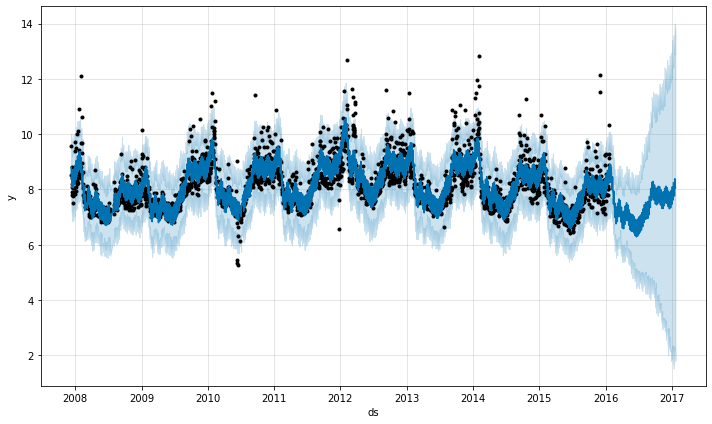

In [37]:
_ = model.plot(forecast)

In [38]:
forecast = model.predict(future)
forecast[['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,trend_lower,trend_upper,yhat,yhat_lower,yhat_upper
0,2007-12-10,1.349221,1.349221,1.349221,8.802711,7.586002,9.998406
1,2007-12-11,1.349148,1.349148,1.349148,8.554691,7.400211,9.773546
2,2007-12-12,1.349076,1.349076,1.349076,8.354953,7.065106,9.668777
3,2007-12-13,1.349003,1.349003,1.349003,8.332300,7.226682,9.652031
4,2007-12-14,1.348931,1.348931,1.348931,8.320971,7.212883,9.537967


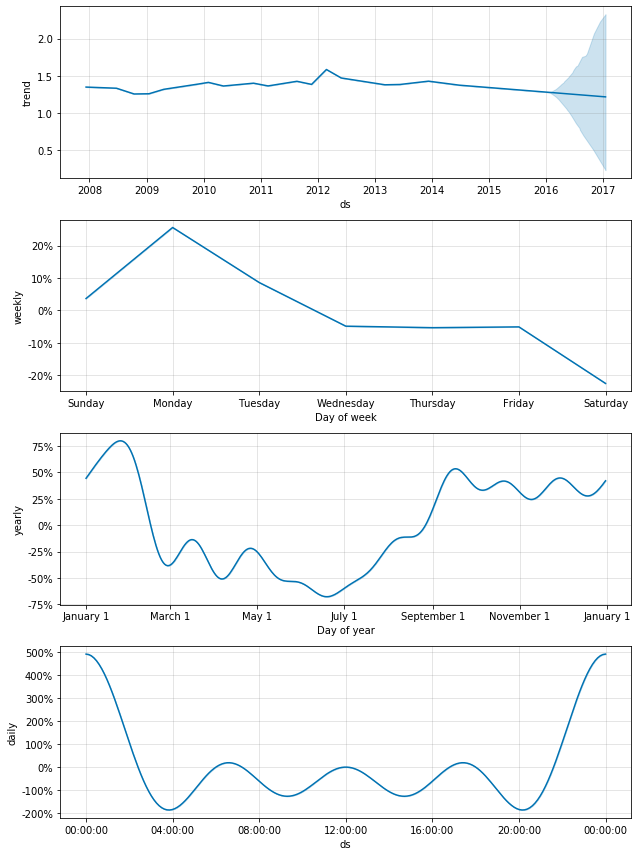

In [39]:
_ = model.plot_components(forecast)

In [40]:
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast)